# KNN Regression and Evaluation


In [48]:
library('caret')

# simulation

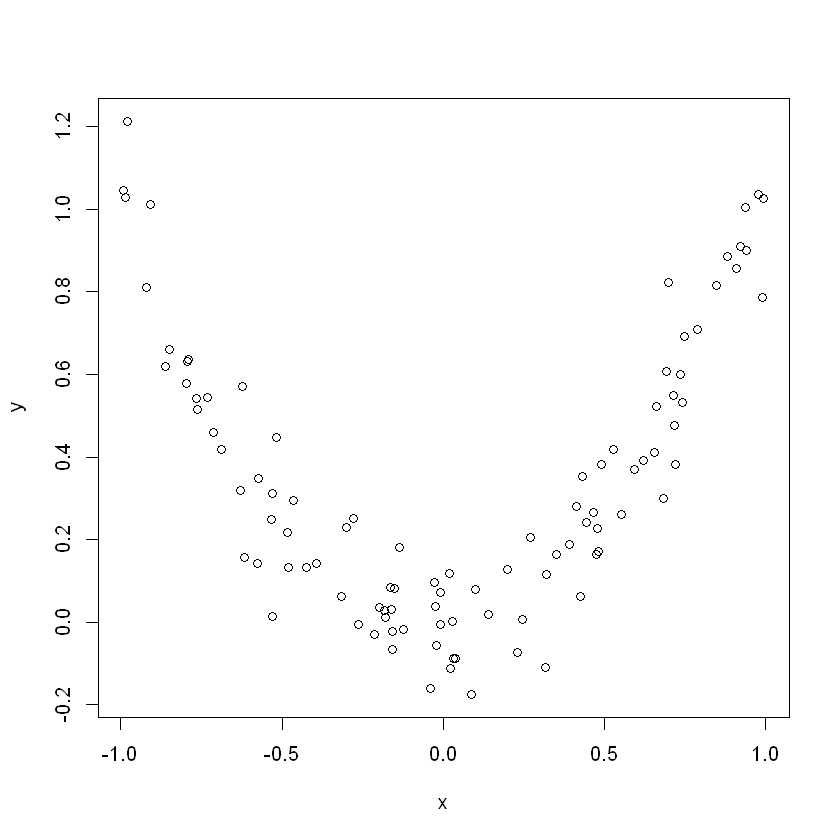

In [49]:
x = runif(100,-1,1)
y = x^2 # f(x) = x^2
e = rnorm(100,0,1/10)
y = y + e
plot(x,y)

In [50]:
df = data.frame(x=x,y=y)

In [51]:
flds = createFolds(1:nrow(df),k=2)
flds

$Fold1
 [1]   1   2   3   5   6   7   9  10  11  14  16  23  24  26  29  30  33  34  36
[20]  41  43  44  45  46  47  49  51  55  56  58  60  61  62  64  66  70  73  75
[39]  79  84  85  86  88  92  93  94  95  97  99 100

$Fold2
 [1]  4  8 12 13 15 17 18 19 20 21 22 25 27 28 31 32 35 37 38 39 40 42 48 50 52
[26] 53 54 57 59 63 65 67 68 69 71 72 74 76 77 78 80 81 82 83 87 89 90 91 96 98

# test/train split

In [52]:
test_df = df[flds[[1]],]
train_df = df[flds[[2]],]

In [53]:
dim(test_df)
dim(train_df)

[1] 50  2

[1] 50  2

In [54]:
# build on the testing data
knn_mod = knnreg(y~.,data=train_df,k=5)

In [55]:
train_preds = predict(knn_mod,train_df)

In [56]:
RMSE_train = sqrt(mean((train_df$y-train_preds)^2))

In [57]:
RMSE_train

[1] 0.09820521

In [58]:
test_preds = predict(knn_mod,test_df)

In [59]:
RMSE_test = sqrt(mean((test_df$y-test_preds)^2))

In [60]:
RMSE_test

[1] 0.1251084

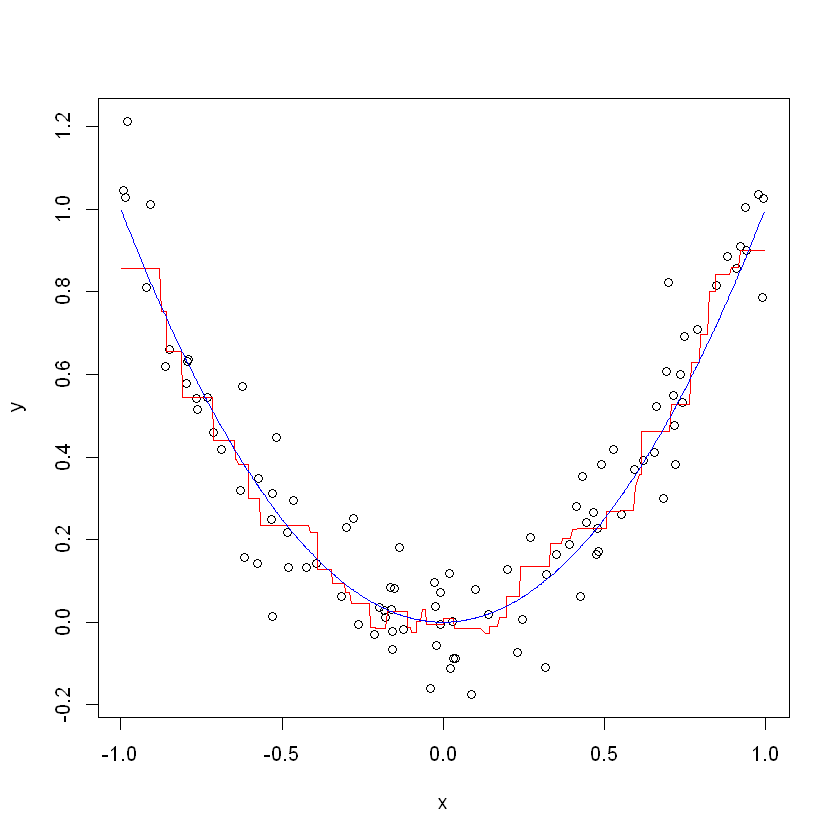

In [61]:
plot(x,y)
xe = data.frame(x=sort(runif(1000,-1,1)))
lines(xe$x,predict(knn_mod,xe),col='red')
lines(xe$x,xe$x^2,col='blue')

notice how the training RMSE is typically loweer than the testing RMSE

# k fold cross validation

In [62]:
flds = createFolds(1:nrow(df),k=5)
flds

$Fold1
 [1]   7   9  17  21  22  27  28  45  48  50  52  60  62  67  72  81  86  89  96
[20] 100

$Fold2
 [1]  1  4  6 11 25 30 33 35 38 43 53 57 61 65 74 92 93 95 98 99

$Fold3
 [1]  3 10 15 20 23 26 31 42 44 49 56 66 69 71 75 76 79 80 88 97

$Fold4
 [1]  2 13 14 16 19 29 32 34 37 47 51 55 58 63 64 77 82 87 90 94

$Fold5
 [1]  5  8 12 18 24 36 39 40 41 46 54 59 68 70 73 78 83 84 85 91

In [63]:
lengths(flds)

Fold1 Fold2 Fold3 Fold4 Fold5 
   20    20    20    20    20

In [64]:
i = 1
test_df = df[flds[[i]],]
train_df = df[unlist(flds[-i]),]

In [65]:
dim(test_df)
dim(train_df)

[1] 20  2

[1] 80  2

In [66]:
knn_mod = knnreg(y~.,data=train_df,k=10)

train_preds = predict(knn_mod,train_df)
RMSE_train = sqrt(mean((train_df$y-train_preds)^2))

test_preds = predict(knn_mod,test_df)
RMSE_test = sqrt(mean((test_df$y-test_preds)^2))

RMSE_train
RMSE_test

[1] 0.1238152

[1] 0.1012941

let's put this in a function

In [67]:
tt_split_eval = function(train_idx,test_idx){
    test_df = df[test_idx,]
    train_df = df[train_idx,]
    
    knn_mod = knnreg(y~.,data=train_df,k=5)

    train_preds = predict(knn_mod,train_df)
    RMSE_train = sqrt(mean((train_df$y-train_preds)^2))

    test_preds = predict(knn_mod,test_df)
    RMSE_test = sqrt(mean((test_df$y-test_preds)^2))

    return(data.frame(train=RMSE_train,
        test=RMSE_test
                ))
}

In [68]:
flds = createFolds(1:nrow(df),k=10)
rmses = lapply(1:length(flds),function(i){
    tdf = tt_split_eval(train_idx = unlist(flds[-i]),test_idx = flds[[i]])
    tdf$i = i 
    return(tdf)
})

In [69]:
rmses[[1]]

train,test,i
<dbl>,<dbl>,<int>
0.0990263,0.1318991,1


In [70]:
rmses[[2]]

train,test,i
<dbl>,<dbl>,<int>
0.1046009,0.06740128,2


In [71]:
RMSE = Reduce('rbind',rmses)

In [72]:
RMSE

train,test,i
<dbl>,<dbl>,<int>
0.09902630,0.13189909,1
0.10460087,0.06740128,2
0.09492243,0.17345004,3
0.10328117,0.09268018,4
0.10541600,0.09086171,5
0.09522706,0.14935813,6
0.09859184,0.12656897,7
0.09445275,0.13987197,8
0.10521049,0.09195966,9


In [73]:
library('reshape2')

In [74]:
mRMSE = reshape2::melt(RMSE,id.vars='i')
mRMSE

i,variable,value
<int>,<fct>,<dbl>
1,train,0.09902630
2,train,0.10460087
3,train,0.09492243
4,train,0.10328117
5,train,0.10541600
6,train,0.09522706
7,train,0.09859184
8,train,0.09445275
9,train,0.10521049


In [75]:
library('ggplot2')

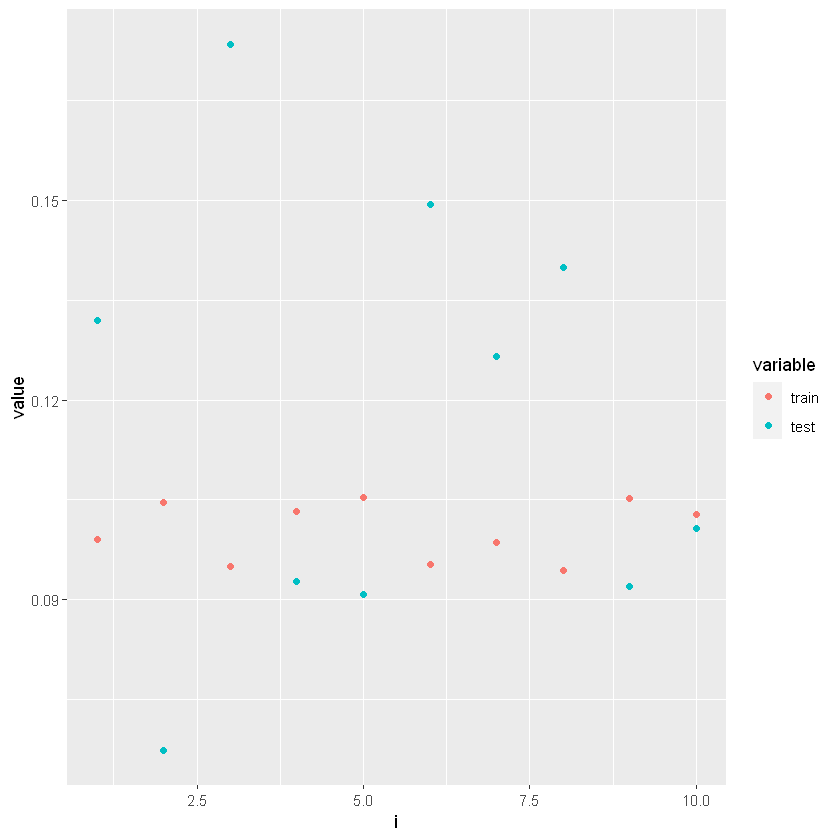

In [76]:
ggplot(data=mRMSE,mapping=aes(x=i,y=value,color=variable))+
    geom_point()

in total summary we can summarize the RMSEs

In [77]:
median(RMSE$test)

[1] 0.1136741

How can we use this to choose a value of $k$ for KNN? Use a train/validate/test 3-way split

In [78]:
flds = createFolds(1:nrow(df),k=10)
flds

$Fold01
 [1]  2  7 12 42 50 54 57 77 83 95

$Fold02
 [1]  4 11 27 31 52 59 71 80 85 90

$Fold03
[1] 18 25 43 47 53 72 89 99

$Fold04
 [1]  8 19 21 35 40 48 56 58 76 88 97

$Fold05
 [1]  6 14 23 28 29 39 61 65 91 93 96

$Fold06
 [1] 13 16 17 32 41 60 62 74 82 87

$Fold07
 [1]  5  9 37 38 46 55 66 70 78 81

$Fold08
 [1]  1  3 10 33 36 45 67 75 84 94

$Fold09
 [1] 20 22 26 30 49 64 68 69 79 86

$Fold10
 [1]  15  24  34  44  51  63  73  92  98 100

In [79]:
i = 1
test_idx = flds[[i]]
trainval_idx = unlist(flds[-i])

In [80]:
test_df = df[test_idx,]
trainval_df = df[trainval_idx,]

In [81]:
dim(test_df)
dim(trainval_df)

[1] 10  2

[1] 90  2

In [82]:
tv_flds = createFolds(1:nrow(trainval_df),k=10)
tv_flds

$Fold01
[1]  7 13 14 33 42 54 61 69 76

$Fold02
[1] 15 22 23 28 45 55 63 68 90

$Fold03
 [1] 11 21 24 35 49 58 60 71 72 86

$Fold04
[1]  2 18 36 43 47 50 79 83 87

$Fold05
 [1]  3  9 16 41 44 46 52 56 74 75

$Fold06
[1] 17 20 26 30 32 65 67 84 88

$Fold07
[1]  1 12 25 38 51 62 77 81 82

$Fold08
[1]  5 10 27 39 40 57 59 70 89

$Fold09
[1]  4 19 34 37 64 66 73 85

$Fold10
[1]  6  8 29 31 48 53 78 80

In [83]:
j=1
val_idx = tv_flds[[j]]
train_idx = unlist(tv_flds[-j])

In [84]:
train_df = trainval_df[train_idx,]
val_df = trainval_df[val_idx,]

In [85]:
dim(train_df)
dim(val_df)

[1] 81  2

[1] 9 2

In [86]:
tt_split_eval_k = function(train_idx,val_idx,k=1){
    train_df = trainval_df[train_idx,]
    val_df = trainval_df[val_idx,]
    
    knn_mod = knnreg(y~.,data=train_df,k=k)

    train_preds = predict(knn_mod,train_df)
    RMSE_train = sqrt(mean((train_df$y-train_preds)^2))

    val_preds = predict(knn_mod,val_df)
    RMSE_val = sqrt(mean((val_df$y-val_preds)^2))

    return(data.frame(train=RMSE_train,
        val=RMSE_val
                ))
}

In [87]:
tt_split_eval_k(train_idx,val_idx,k=5)

train,val
<dbl>,<dbl>
0.1065262,0.1121581


In [88]:
tt_split_eval_k(train_idx,val_idx,k=10)

train,val
<dbl>,<dbl>
0.1258494,0.09423646


In [89]:
RMSE = lapply(1:75,function(k){
    tdf = tt_split_eval_k(train_idx,val_idx,k=k)
    tdf$k = k
    return(tdf)
})
RMSE = Reduce('rbind',RMSE)
head(RMSE)

,train,val,k
,<dbl>,<dbl>,<int>
1,0.00000000,0.14541690,1
2,0.08982306,0.11695696,2
3,0.09660617,0.13862874,3
4,0.10131723,0.13837341,4
5,0.10652617,0.11215809,5
6,0.10915265,0.09986752,6


In [90]:
mRMSE = melt(RMSE,id.vars='k')
head(mRMSE)

,k,variable,value
,<int>,<fct>,<dbl>
1,1,train,0.00000000
2,2,train,0.08982306
3,3,train,0.09660617
4,4,train,0.10131723
5,5,train,0.10652617
6,6,train,0.10915265


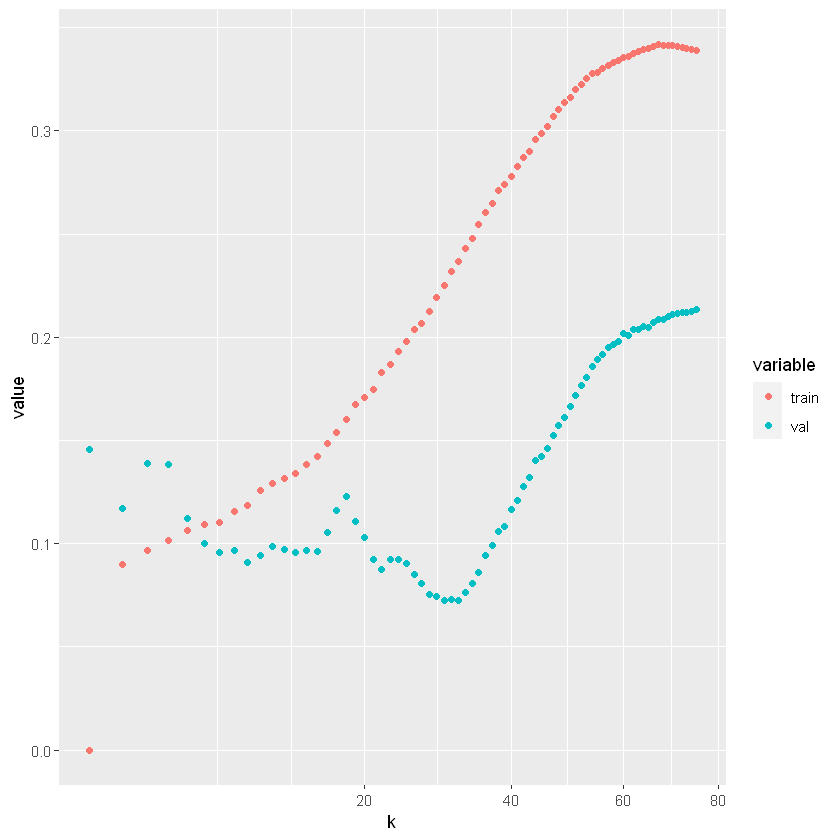

In [91]:
ggplot(data=mRMSE,mapping=aes(x=k,y=value,color=variable))+
    geom_point()+
    scale_x_sqrt()

In [46]:
which.min(RMSE$val)

[1] 15

In [47]:
min_df = RMSE[which.min(RMSE$val),]
min_df

,train,val,k
,<dbl>,<dbl>,<int>
15,0.1068534,0.04623024,15


In [92]:
knn_mod = knnreg(y~.,data=trainval_df,k=min_df$k)

In [93]:
test_preds = predict(knn_mod,test_df)
RMSE_val = sqrt(mean((test_df$y-test_preds)^2))
RMSE_val

[1] 0.1633997

can I do this in a cross validated way? yes use nested cross validation!

In [ ]:
# outer loop = split into test and trainval datasets
# inner loop = MBP, split into train/val and search over k

In [ ]:
flds = createFolds(1:nrow(df),k=10)

In [ ]:
TEST_RMSE = rep(NA,length(flds))

for(i in 1:length(flds)){
    
    # split testing from trainval
    test_idx = flds[[i]]
    trainval_idx = unlist(flds[-i])
    test_df = df[test_idx,]
    trainval_df = df[trainval_idx,]
     
    #MODEL BUILDING PROCESS
    tv_flds = createFolds(1:nrow(trainval_df),k=10)
    
    K_seq = seq(1,75)
    VAL_MTX = array(NA,c(length(tv_flds),length(K_seq)))
    
    for(j in 1:length(tv_flds)){
        
        val_idx = tv_flds[[j]]
        train_idx = unlist(tv_flds[-j])
        train_df = trainval_df[train_idx,]
        val_df = trainval_df[val_idx,]

        for(k in K_seq){
            knn_mod = knnreg(y~.,data=train_df,k=k)
            val_preds = predict(knn_mod,val_df)
            VAL_MTX[j,k] = sqrt(mean((val_df$y-val_preds)^2))
        }
    }
    
    VAL_K = apply(VAL_MTX,2,mean)
    K_hat = K_seq[which.min(VAL_K)]
    
    knn_mod = knnreg(y~.,data=trainval_df,k=K_hat)
    
    # eval on testing data
    test_preds = predict(knn_mod,test_df)
    TEST_RMSE[i] = sqrt(mean((test_df$y-test_preds)^2))
}

consider for a single run:

In [ ]:
ggplot(data=melt(VAL_MTX),mapping=aes(x=Var2,y=value,color=as.factor(Var1)))+geom_point()

In [ ]:
plot(VAL_K)

In [ ]:
K_hat = K_seq[which.min(VAL_K)]
K_hat

In [ ]:
# overall

In [ ]:
TEST_RMSE

In [ ]:
mean(TEST_RMSE)

In [ ]:
plot(VAL_K)
abline(h=mean(TEST_RMSE),col='red')

How do we build the final model for prediction? Basically pull out the inner loop

In [ ]:
tv_flds = createFolds(1:nrow(df),k=10) # use all df
    
K_seq = seq(1,75)
VAL_MTX = array(NA,c(length(tv_flds),length(K_seq)))

for(j in 1:length(tv_flds)){

    val_idx = tv_flds[[j]]
    train_idx = unlist(tv_flds[-j])
    train_df = df[train_idx,]
    val_df = df[val_idx,]

    for(k in K_seq){
        knn_mod = knnreg(y~.,data=train_df,k=k)
        val_preds = predict(knn_mod,val_df)
        VAL_MTX[j,k] = sqrt(mean((val_df$y-val_preds)^2))
    }
}

VAL_K = apply(VAL_MTX,2,mean)
K_hat = K_seq[which.min(VAL_K)]

# fit with all the data
knn_mod = knnreg(y~.,data=df,k=K_hat)

In [ ]:
plot(VAL_K)

In [ ]:
K_hat

In [ ]:
plot(x,y)
xe = data.frame(x=sort(runif(1000,-1,1)))
lines(xe$x,predict(knn_mod,xe),col='red')
lines(xe$x,xe$x^2,col='blue')